## Intel Scene Classififcation

### The given dataset has different scenes as below
1.buildings
2.forest
3.glacier
4.mountain
5.sea
6.street

For each sceens, it has individual set of pictures, for to train and the test model.

This model uses CV2 Image read option to get the HOG features of the Image.
We will be using Linear SVC for better accurancy and performance

### Lets import the necesassary libraries and then images

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

from tqdm import tqdm
import random as rn
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from skimage import feature, color, data
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

Using TensorFlow backend.


#### This dataset has 6 categories with owen set of images for Train & test model. So, lets import the train & test images seperatly

In [2]:
# The training data set is in the /Volumes/Arun⁩/Machine Learning⁩/Final Project⁩/Intel Image Classification/seg_train
trn_img_path = "/Users/macos/Documents/Intel Image Classification/seg_train"
print(os.listdir(trn_img_path))

# The testing data set is in the /Volumes/Arun⁩/Machine Learning⁩/Final Project⁩/Intel Image Classification/seg_test
tst_img_path = "/Users/macos/Documents/Intel Image Classification/seg_test"
print(os.listdir(tst_img_path))

['forest', 'buildings', '.DS_Store', 'Icon\r', 'glacier', 'street', 'mountain', 'sea']
['forest', 'buildings', '.DS_Store', 'Icon\r', 'glacier', 'street', 'mountain', 'sea']


#### Lets assign the path of test & train images sepratly for each categories and then defines the necesary arrays to store the needed information

In [3]:
#assign the path variable of training image category directories
trn_buildings_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/buildings"
trn_forest_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/forest"
trn_glacier_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/glacier"
trn_mountain_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/mountain"
trn_sea_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/sea"
trn_street_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/street"

#assign the path variable of testing image category directories
tst_buildings_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/buildings"
tst_forest_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/forest"
tst_glacier_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/glacier"
tst_mountain_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/mountain"
tst_sea_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/sea"
tst_street_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/street"

# Lets create 2 set of arrays for train & testing data's. One for to store the Image data and anther one for label details
X_train_image = [] #Stores the training Image file info
X_train_data =[] # Stores the training image data
Z_train = [] # Stores the training image label

X_test_image = [] # Stores the testing image file info
X_test_data = [] # Stores the testing image data
Z_test = [] # Stores the testing image label

#### Create a function to load the image file and store the hog feature from it into train & test data's

In [6]:
# Lets define a function to store the image data and label for it
def image_data (scene_type, scene_path, data_type):
    for img in tqdm(os.listdir(scene_path)):
        img_path = os.path.join(scene_path,img)
        if img_path.endswith('.jpg'):
            img_data = cv2.imread(img_path)
            img_data = cv2.resize(img_data,(100,100))
            image_size = img_data.shape
            if(data_type =='Training'):
                X_train_image.append(feature.hog(img_data))
                Z_train.append(str(scene_type))
            if(data_type =='Testing'):
                X_test_image.append(feature.hog(img_data))
                Z_test.append(np.array(str(scene_type)))

In [7]:
# call the Image_data function for to store training images from each scene

#building images
image_data('Building',trn_buildings_dir,'Training')
print(len(X_train_image))

#forest images
image_data('Forest',trn_forest_dir,'Training')
print(len(X_train_image))

# glacier images
image_data('Glacier',trn_glacier_dir,'Training')
print(len(X_train_image))

# mountain images
image_data('Mountain',trn_mountain_dir,'Training')
print(len(X_train_image))

# sea images
image_data('Sea',trn_sea_dir,'Training')
print(len(X_train_image))

#street images
image_data('Street',trn_street_dir,'Training')
print(len(X_train_image))


  0%|          | 5/2272 [00:00<00:46, 48.41it/s]

2586


  0%|          | 7/2405 [00:00<00:37, 64.17it/s]

4857


  0%|          | 11/2513 [00:00<00:24, 103.25it/s]

7261


  0%|          | 11/2275 [00:00<00:20, 108.54it/s]

9773


  0%|          | 9/2383 [00:00<00:28, 83.21it/s]

12047


100%|██████████| 2383/2383 [00:21<00:00, 112.59it/s]

14429


In [8]:
# call the Image_data function for to store testing images from each scene

#building images
image_data('Building',tst_buildings_dir,'Testing')
print(len(X_test_image))

#forest images
image_data('Forest',tst_forest_dir,'Testing')
print(len(X_test_image))

# glacier images
image_data('Glacier',tst_glacier_dir,'Testing')
print(len(X_test_image))

# mountain images
image_data('Mountain',tst_mountain_dir,'Testing')
print(len(X_test_image))

# sea images
image_data('Sea',tst_sea_dir,'Testing')
print(len(X_test_image))

#street images
image_data('Street',tst_street_dir,'Testing')
print(len(X_test_image))


  1%|          | 13/2272 [00:00<00:18, 124.40it/s]

2191


  0%|          | 11/2405 [00:00<00:23, 103.61it/s]

4462


  0%|          | 12/2513 [00:00<00:21, 114.75it/s]

6866


  1%|          | 14/2275 [00:00<00:16, 137.03it/s]

9378


  0%|          | 7/2383 [00:00<00:36, 64.68it/s]

11652


100%|██████████| 2383/2383 [00:36<00:00, 64.88it/s]

14034


In [9]:
X_train_image

[array([0.05435067, 0.00446342, 0.00550465, ..., 0.05189313, 0.06334528,
        0.02324296]),
 array([0.00145095, 0.00023073, 0.00066287, ..., 0.00490565, 0.00548841,
        0.01011375]),
 array([0.02901492, 0.00094195, 0.01273575, ..., 0.011846  , 0.01048224,
        0.0093567 ]),
 array([0.00531586, 0.00111106, 0.00079701, ..., 0.00038978, 0.        ,
        0.        ]),
 array([0.01655991, 0.00043877, 0.00069094, ..., 0.01747328, 0.01101152,
        0.01593102]),
 array([0.        , 0.        , 0.        , ..., 0.00627991, 0.00724223,
        0.01937937]),
 array([0.0117382 , 0.00776204, 0.00507197, ..., 0.01788985, 0.02383896,
        0.03451248]),
 array([0.01461948, 0.00282271, 0.00803356, ..., 0.00150527, 0.00039318,
        0.        ]),
 array([0.00406055, 0.        , 0.03002224, ..., 0.01256569, 0.00178026,
        0.00472307]),
 array([0.01889516, 0.00227729, 0.00135017, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00152894, 0.        , 0.        , ..., 0

In [10]:
X_test_image

[array([0.05435067, 0.00446342, 0.00550465, ..., 0.05189313, 0.06334528,
        0.02324296]),
 array([0.00145095, 0.00023073, 0.00066287, ..., 0.00490565, 0.00548841,
        0.01011375]),
 array([0.02901492, 0.00094195, 0.01273575, ..., 0.011846  , 0.01048224,
        0.0093567 ]),
 array([0.00531586, 0.00111106, 0.00079701, ..., 0.00038978, 0.        ,
        0.        ]),
 array([0.01655991, 0.00043877, 0.00069094, ..., 0.01747328, 0.01101152,
        0.01593102]),
 array([0.        , 0.        , 0.        , ..., 0.00627991, 0.00724223,
        0.01937937]),
 array([0.0117382 , 0.00776204, 0.00507197, ..., 0.01788985, 0.02383896,
        0.03451248]),
 array([0.01461948, 0.00282271, 0.00803356, ..., 0.00150527, 0.00039318,
        0.        ]),
 array([0.00406055, 0.        , 0.03002224, ..., 0.01256569, 0.00178026,
        0.00472307]),
 array([0.01889516, 0.00227729, 0.00135017, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00152894, 0.        , 0.        , ..., 0

In [11]:
# Let's encode the lables
le = LabelEncoder()
y_train = le.fit_transform(Z_train)
y_test = le.fit_transform(Z_test)

# y_train = to_categorical(y_train,6)
# y_test = to_categorical(y_test,6)

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC

In [21]:
#image_data_train[1].reshape((-1))
#logistic / svm / randomforest -> extract using hog / sift

array([171, 115,  80, ...,  85, 213, 248], dtype=uint8)

In [16]:
clf = LinearSVC(random_state=0,tol=1e-5)

In [17]:
clf.fit(X_train_image,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [18]:
clf.coef_

array([[-0.23404704,  0.63068501,  0.87351615, ...,  0.45194578,
        -0.8087152 ,  1.43320608],
       [ 1.16281172,  2.2994012 ,  0.44897138, ..., -0.84937698,
         0.37646725, -0.61247999],
       [-0.92159248, -0.73476187, -0.04676477, ...,  0.39600167,
         0.3030404 , -0.22137564],
       [ 0.35540347, -0.41510668, -0.09256453, ..., -0.44716518,
         0.45542493, -0.59571357],
       [-0.66363143,  0.62443846,  0.4171195 , ..., -0.2346196 ,
        -0.08410452, -0.31983068],
       [-0.24415117, -0.9492495 , -1.85060696, ..., -0.13810226,
         0.40839554, -0.15122374]])

In [19]:
clf.intercept_

array([-0.4520952 ,  0.2262379 , -0.30194647, -0.34450433, -0.51347719,
       -0.72663904])

In [28]:
# filter all the warnings
import warnings
warnings.filterwarnings('ignore')

# 10-fold cross validation
clf_score = clf.score(X_test_image,y_test)
print('Score', clf_score)
kfold = KFold(n_splits=10, random_state=7)
cv_results = cross_val_score(clf, X_train_image, y_train, cv=kfold, scoring="accuracy")
print(cv_results)

Score 0.8383924754168448
[0.54885655 0.66874567 0.77130977 0.58419958 0.26056826 0.24809425
 0.39085239 0.37907138 0.62023562 0.5332871 ]


NameError: name 'names' is not defined

In [157]:
print(cv_results.mean(), cv_results.std())

0.5005220573181738 0.16566337336644713


#### Predict the scene classification for some random image

In [61]:
label=['Building','Forest', 'Glacier','Mountain','Sea','Street']

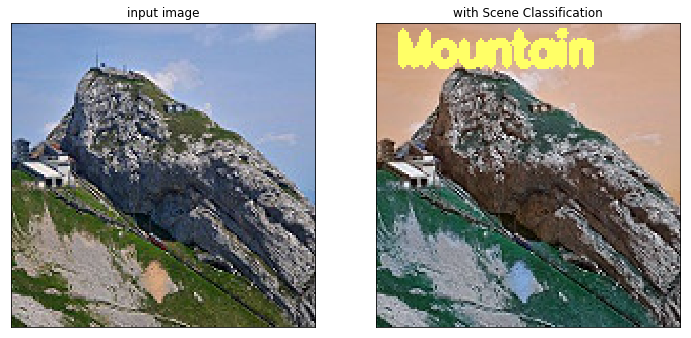

In [124]:
prd_img_path = '/Users/macos/Documents/Intel Image Classification/seg_pred/839.jpg'
ip_image = Image.open(prd_img_path)
img = cv2.imread(prd_img_path)
prd_img = cv2.resize(img,(100,100))
prd_img_data = feature.hog(prd_img)
scene_predict = clf.predict(prd_img_data.reshape(1, -1))[0]
cv2.putText(img, label[scene_predict],(10,20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,102), 3)
fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(ip_image)
ax[0].set_title('input image')

ax[1].imshow(img)
ax[1].set_title('with Scene Classification');


In [182]:
def scene_predict(img_path):
    image = cv2.imread(img_path)
    ip_image = Image.open(img_path)
    prd_image = cv2.resize(image,(100,100))
    prd_image_data = feature.hog(prd_image)
    scene = clf.predict(prd_image_data.reshape(1, -1))[0]
    fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
    cv2.putText(image, label[scene],(10,20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,102), 3)

    ax[0].imshow(ip_image)
    ax[0].set_title('input image')

    ax[1].imshow(image)
    ax[1].set_title('with Scene Classification');

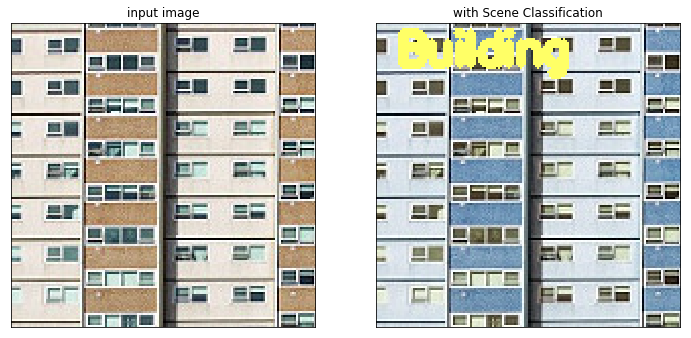

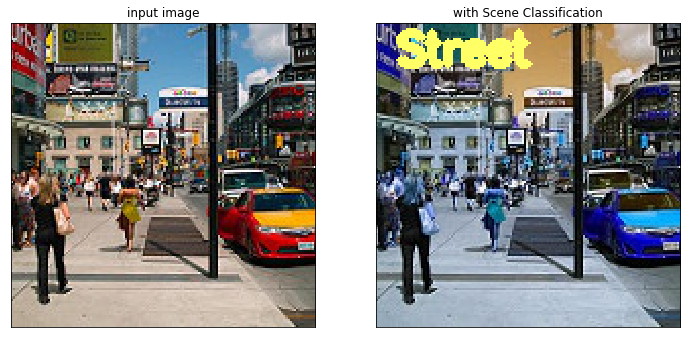

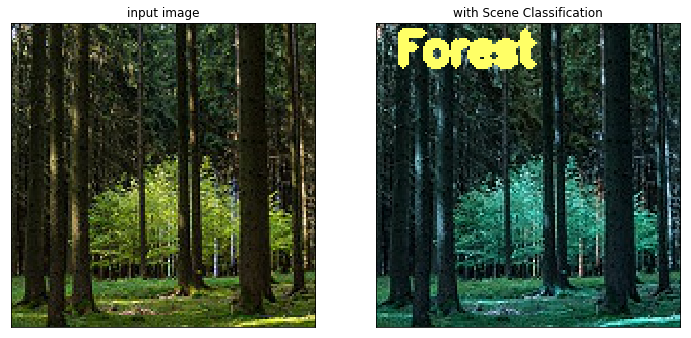

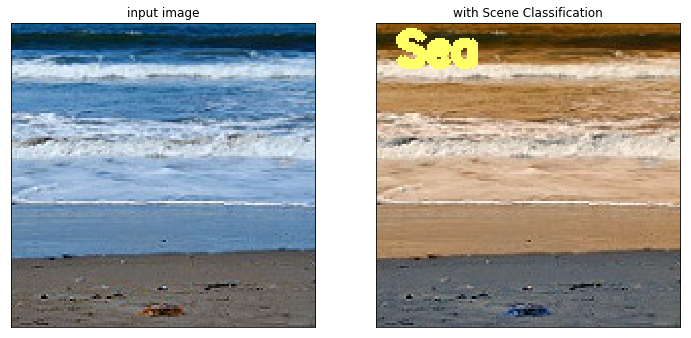

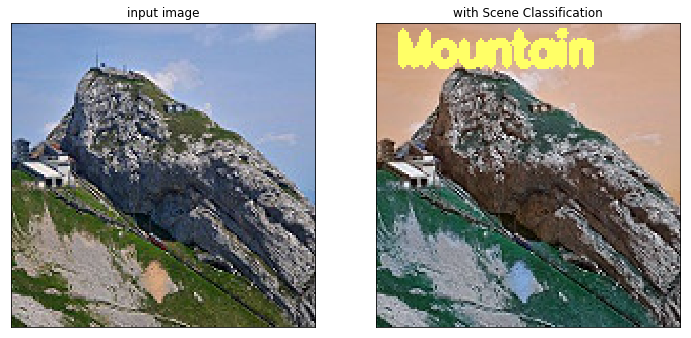

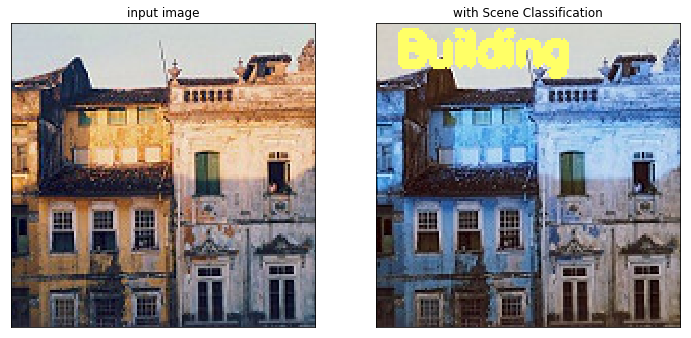

In [183]:
ip_img_folder = '/Users/macos/Documents/Intel Image Classification/seg_pred/'
ip_img_files = ['222.jpg','121.jpg','88.jpg','398.jpg','839.jpg', '520.jpg']
scene_predicted = [scene_predict(os.path.join(ip_img_folder,img_file))for img_file in ip_img_files]

['Building', 'Street', 'Forest', 'Sea', 'Mountain', 'Building']